In [15]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns
import os
%matplotlib inline

In [16]:
plt.rcParams["figure.figsize"] = (4, 2)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'gray' # grayscale looks better

In [17]:
# test_data = np.loadtxt('./mnist_data/mnist_test.csv', delimiter=',')[:,1:]
folder_paths = {i:'./recut_images/{}'.format(i) for i in range(10)}
# folder_paths = {i:'./crop_images/{}'.format(i) for i in range(10)}
folder_paths

{0: './recut_images/0',
 1: './recut_images/1',
 2: './recut_images/2',
 3: './recut_images/3',
 4: './recut_images/4',
 5: './recut_images/5',
 6: './recut_images/6',
 7: './recut_images/7',
 8: './recut_images/8',
 9: './recut_images/9'}

In [18]:
img_0_files = os.listdir(folder_paths[0])
print(img_0_files[:])
print(len(img_0_files))
np_img = [cv2.imread(folder_paths[0] + '/' + name) for name in img_0_files]

['13 (4).jpg', '22.jpg', '33 (2).jpg', '11 (1).jpg', '34.jpg', '1 (2).jpg', '30 (3).jpg', '19 (2).jpg', '35 (1).jpg', '11.jpg', '8 (2).jpg', '30 (2).jpg', '3 (4).jpg', '44.jpg', '6 (4).jpg', '50.jpg', '39 (3).jpg', '15 (3).jpg', '40 (4).jpg', '15 (2).jpg', '36 (4).jpg', '10.jpg', '24 (4).jpg', '23 (3).jpg', '41 (3).jpg', '24 (3).jpg', '15 (1).jpg', '25 (2).jpg', '31 (2).jpg', '40 (1).jpg', '14 (4).jpg', '16 (3).jpg', '31 (3).jpg', '11 (3).jpg', '9 (1).jpg', '12 (1).jpg', '42 (3).jpg', '50 (4).jpg', '28 (1).jpg', '14 (3).jpg', '32 (2).jpg', '47 (2).jpg', '5.jpg', '48 (1).jpg', '1 (4).jpg', '6 (3).jpg', '4.jpg', '49 (2).jpg', '21 (4).jpg', '27.jpg', '36 (2).jpg', '7 (3).jpg', '33 (1).jpg', '35 (4).jpg', '48 (2).jpg', '27 (1).jpg', '3.jpg', '34 (1).jpg', '26 (1).jpg', '11 (4).jpg', '32 (1).jpg', '35.jpg', '13.jpg', '5 (1).jpg', '29.jpg', '12 (3).jpg', '22 (4).jpg', '36 (3).jpg', '12 (4).jpg', '46 (3).jpg', '28 (3).jpg', '41.jpg', '28.jpg', '45 (3).jpg', '2 (1).jpg', '4 (2).jpg', '15.jpg',

In [19]:
def img_data():
    images_dict = {}
    for label, path in folder_paths.items():
        img_files = os.listdir(path)
        np_img = [cv2.imread(path + '/' + file) for file in img_files]
        images_dict.update({label: np_img})
    return images_dict

image_data = img_data()

In [20]:
test_img = image_data[1][6]
print(test_img.shape)
def preprocess_img(test_img):
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
#     pil_img = Image.fromarray(gray_img)
    
    blur = cv2.GaussianBlur(gray_img, (7,7), 0)
    ret, threshold = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    resized_thr = cv2.resize(threshold, (28,28), interpolation = cv2.INTER_CUBIC)

#     resized = pil_img.resize((28, 28), Image.ANTIALIAS)
#     resized_img = np.array(resized)
    return np.array(resized_thr)

a = preprocess_img(test_img)
a.shape

(297, 166, 3)


(28, 28)

In [21]:
def batch_data(batch_image_data):
    np_img = []
    for i in range(10):
        images = batch_image_data[i]
        pp_img = [np.hstack((preprocess_img(img).reshape(28*28,), np.array([i]))) for img in images]
        np_img.extend(pp_img)
    return np.array(np_img)

data = batch_data(image_data)

In [22]:
data.shape

(245, 785)

In [23]:
import keras
x_data, y_data = data[:, :-1], data[:, -1:]
x_test_img = x_data.reshape(data.shape[0],28,28,1)
y_test_img = keras.utils.to_categorical(y_data[:, -1:], 10)

In [24]:
x_data.shape

(245, 784)

In [25]:
# from skimage.exposure import rescale_intensity
gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

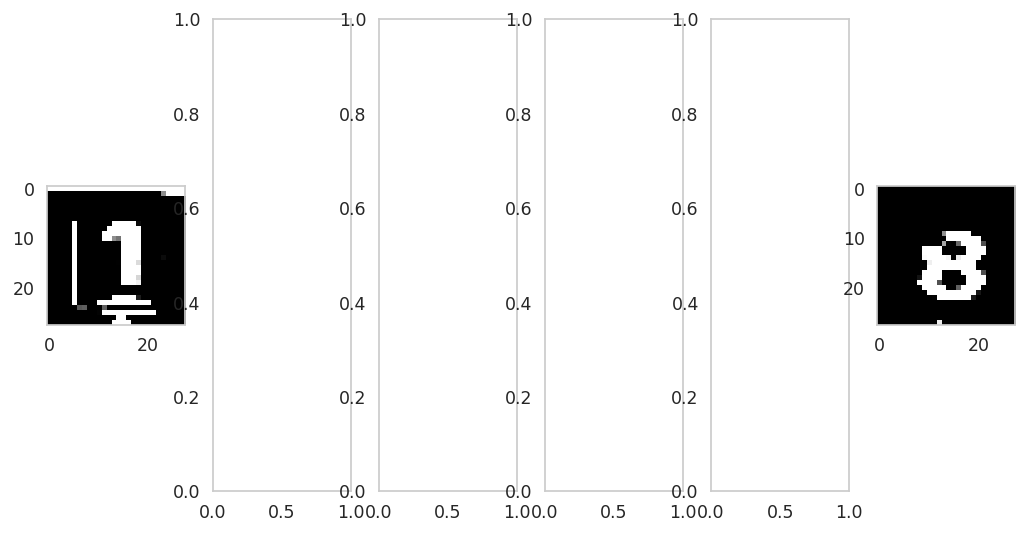

In [26]:
# test_im = x_test_img[0].reshape(28,28)
# resized_img = np.array(Image.fromarray(gray_img).resize((28, 28), Image.ANTIALIAS))
# norm_img = rescale_intensity(gray_img)
# filtered_img = cv2.bilateralFilter(norm_img, 10, 80, 90)

blur = cv2.GaussianBlur(gray_img, (7,7), 0)
retal,threshold2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# adaptive = cv2.adaptiveThreshold(norm_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

# ret, threshold_img = cv2.threshold(filtered_img, 136, 255, cv2.THRESH_BINARY)

resized_thr = cv2.resize(threshold2, (28,28), interpolation = cv2.INTER_CUBIC)

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(10,5))
ax1.imshow(resized_thr)
# ax2.imshow(resized_thr3)
# ax3.imshow(resized_thr4)
# ax4.imshow(resized_thr5)
# ax5.imshow(resized_thr2)
ax6.imshow(x_test_img[230].reshape(28,28))

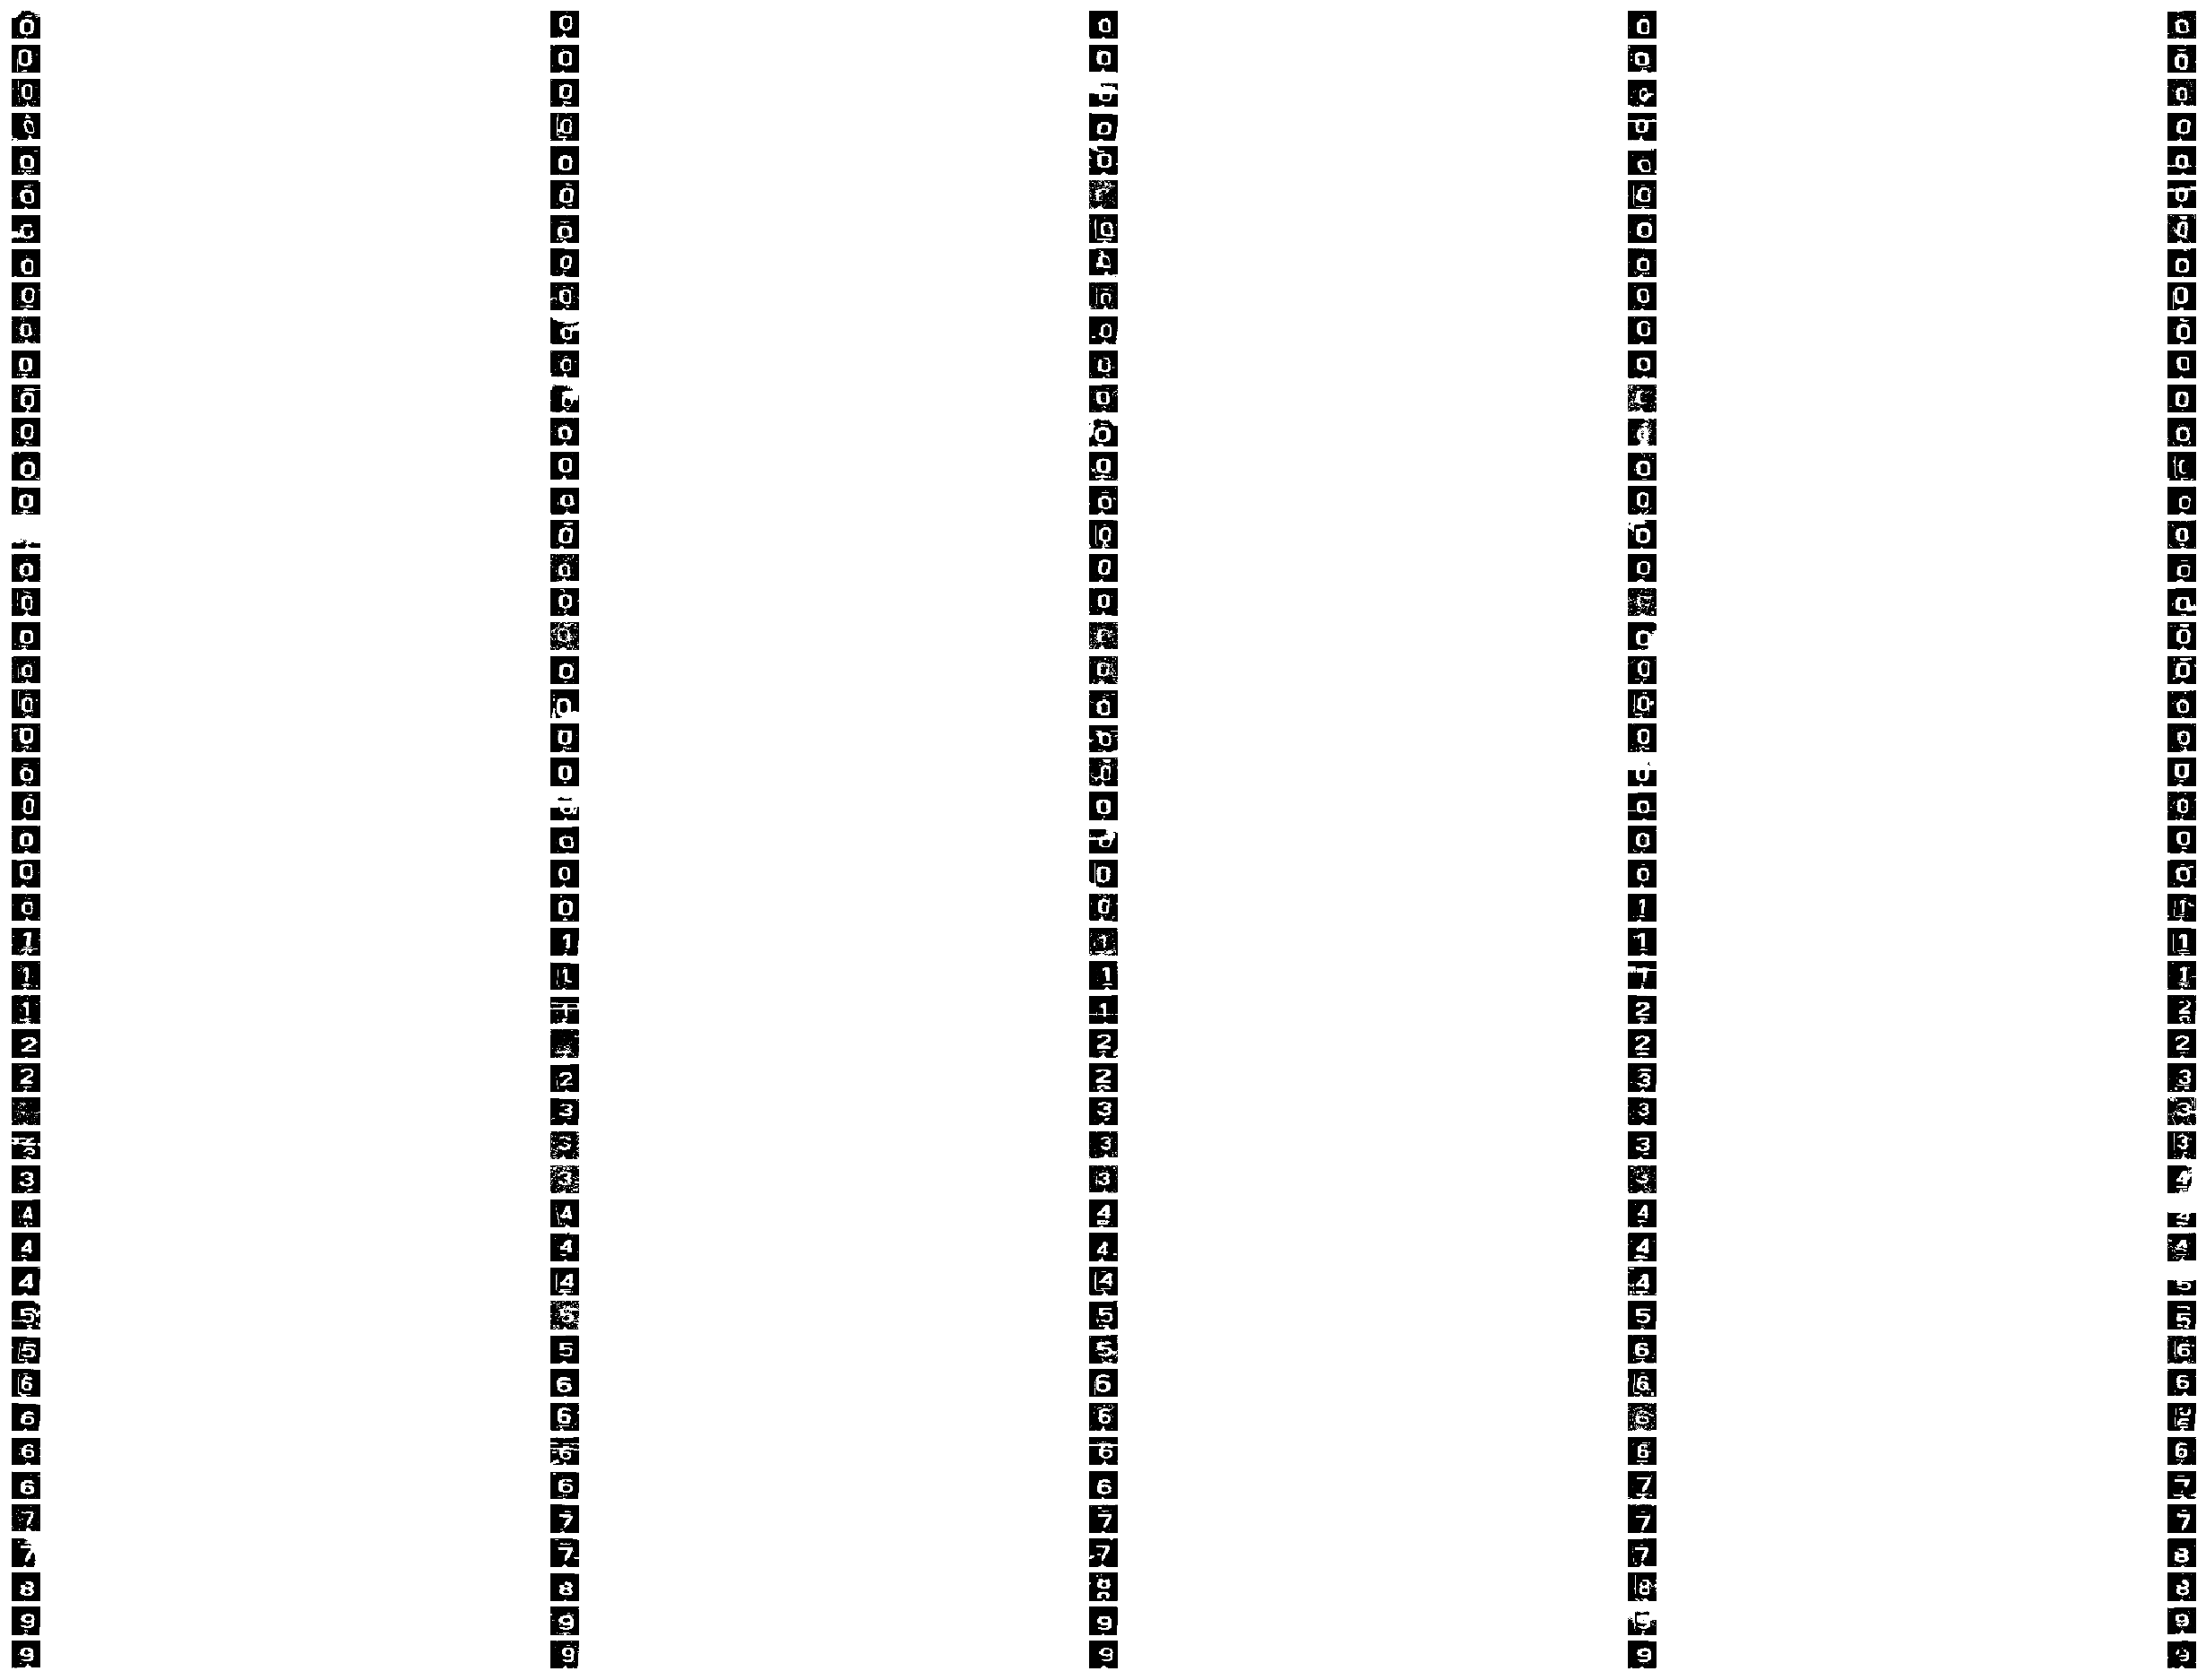

In [217]:
plt.figure(figsize=(30,20))
for i in range(245):
    img = x_test_img[i].reshape(28,28)
    plt.subplot(50,5,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [27]:
def my_evaluate(x_test, model, shape=(1,28,28,1)):
    y_pred = []
    for img in x_test:
        prob = model.predict(img.reshape(shape))
        pred = np.argmax(prob)
        y_pred.append(pred)
    return y_pred



[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


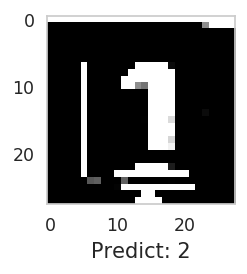

In [28]:
vn_model = load_model('vnocr_classifier.h5')

test_im = resized_thr
prob = vn_model.predict(test_im.reshape((1,28,28,1)))
print(prob)
predict_label = np.argmax(prob)
plt.xlabel('Predict: ' + str(predict_label))
plt.imshow(test_im.reshape(28,28))
# plt.axis('off')

In [211]:
print(vn_model.metrics_names)
vn_model.evaluate(x_test_img, y_test_img)

['loss', 'accuracy']
245/245 [==============================] - 0s 1ms/step


[2211.8489905532524, 0.10204081982374191]

In [30]:
mnist_model = load_model('mnist_classifier.h5')
print(mnist_model.metrics_names)
mnist_model.evaluate(x_test_img, y_test_img)

['loss', 'accuracy']
245/245 [==============================] - 0s 404us/step


[574.4204263492506, 0.6571428775787354]

In [31]:
y_pred = my_evaluate(x_test_img, mnist_model)

In [47]:
from sklearn.metrics import confusion_matrix
y_true = y_test_img.argmax(axis=1)
c = confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6,7,8,9])
norm_c = np.around(c / 245 * 100, decimals = 2)
print(c)

[[104   0   3   0   0   4  15   1   6   0]
 [  1   1   4   4   0   0   0   3   2   0]
 [  0   0   8   2   0   0   0   0   0   0]
 [  0   0   2  12   0   1   0   0   1   0]
 [  1   0   1   7   1   1   3   0   0   1]
 [  0   0   0   0   0   8   0   0   1   0]
 [  0   0   0   0   0   7  11   0   2   0]
 [  0   0   1   0   0   0   0   9   0   1]
 [  0   0   0   0   0   0   2   0   4   0]
 [  1   0   0   1   0   1   2   0   2   3]]


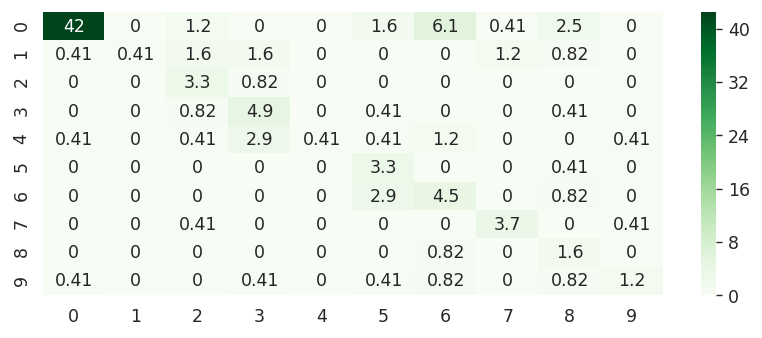

In [50]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(norm_c, index = [i for i in range(10)], columns = [i for i in range(10)])
plt.figure(figsize = (8,3))
sn.heatmap(df_cm, annot=True, cmap='Greens')

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


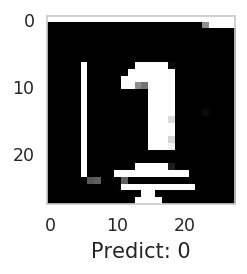

In [213]:
test_im = resized_thr
prob = mnist_model.predict(test_im.reshape((1,28,28,1)))
print(prob)
predict_label = np.argmax(prob)
plt.xlabel('Predict: ' + str(predict_label))
plt.imshow(test_im.reshape(28,28))

In [43]:
a = []
b = np.array([[1,2],[3,4]]).reshape(4,)
c = np.array([5,6,7,8])
a.append(b)
a.append(c)
a.append(c)
d = np.array(a)
f = np.zeros([3, 1])
e = np.hstack((d,f))
print(d.shape)
print(d)
print(e.shape)
print(e)


(3, 4)
[[1 2 3 4]
 [5 6 7 8]
 [5 6 7 8]]
(3, 5)
[[1. 2. 3. 4. 0.]
 [5. 6. 7. 8. 0.]
 [5. 6. 7. 8. 0.]]


In [31]:
a = np.array([1,2,3])
b = np.array([4])
np.hstack((a,b))

array([1, 2, 3, 4])